## Titanic Dataset Description

In [3]:
import numpy as np  # math
import pandas as pd  # manipulation

df = pd.read_csv('titanic.txt')   # .read_csv works even with .txt file
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Plot how many of the passengers were children, youth, middle age and old?


<function matplotlib.pyplot.show(*args, **kw)>

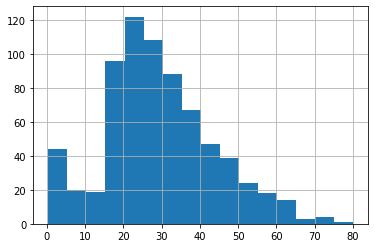

In [3]:
import matplotlib.pyplot as plt  # same as 'from matplotlib import pyplot as plt'
df['Age'].hist(bins=16)  # 
plt.show

# the 'y' axis represents the frequency 
# the 'x' axis represents the 'age' value

# How many null values for 'Age'
## (COUNT OF NULL VALUES)

In [4]:
df['Age'].isna().sum()  # all the age rows that are Null

177

## Create a new column as gender, when Sex is female it is zero when sex is male it is one


In [5]:
# create a new column as gender, when Sex is female it is zero when sex is male it is one
df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} )
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


## Age range  
## (BOX PLOT)

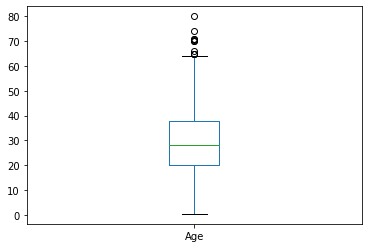

In [6]:
df['Age'].plot.box()

# Find the number of C class passengers
## Counting sums

In [7]:
len(df[df['Embarked'] == 'C'])

168

## Plot age in a cerrain class

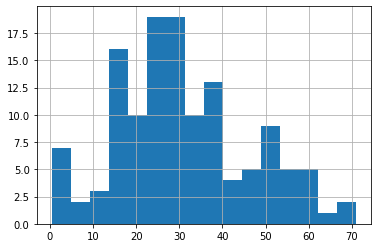

In [8]:
# df['Age'].hist(bins=16)  # 
df[df['Embarked'] == 'C']['Age'].hist(bins=16)


## Normal distribution

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

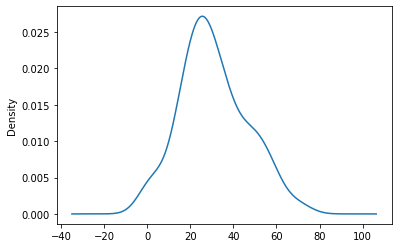

In [9]:
df[df['Embarked'] == 'C']['Age'].plot(kind='kde')
df['Embarked'].describe()

In [10]:
df['Embarked'].nunique()

3

In [11]:
ls_embarked = df['Embarked'].dropna().values
len(ls_embarked)


889

In [12]:
ls_embarked[:10]

array(['S', 'C', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'C'], dtype=object)

## The *pandas* way of getting a histogram of unique values

In [13]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

# PLOT!!!!

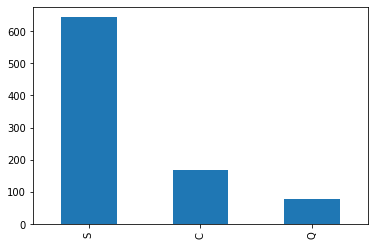

In [14]:
df['Embarked'].value_counts().plot(kind='bar')  # bar chart of the amount embarked passengers by class

# (SEABORN PLOT)

male      577
female    314
Name: Sex, dtype: int64

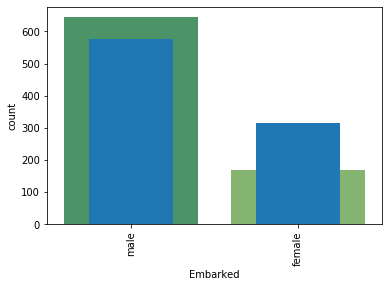

In [15]:
import seaborn as sns

# Bar Chart Example #1 (Simple): Categorical Variables Showing Counts
sns.countplot(x="Embarked", palette="summer", data=df)

df['Embarked'].value_counts()

df['Sex'].value_counts().plot(kind='bar')

df['Sex'].value_counts()

## * as a dictionary

In [16]:
dict(df['Sex'].value_counts())

{'male': 577, 'female': 314}

# Plot the histogram of age for both sex of thos e in class C

Sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

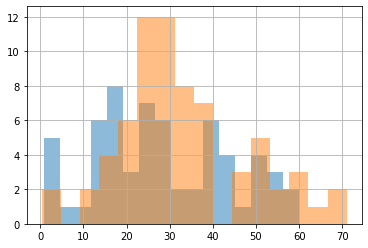

In [17]:
# plot both sexs by class 
df[df['Embarked'] == 'C'].groupby('Sex')['Age'].hist(bins=16, alpha=0.5) # < alpha changes plot transparency

## Fare by Age

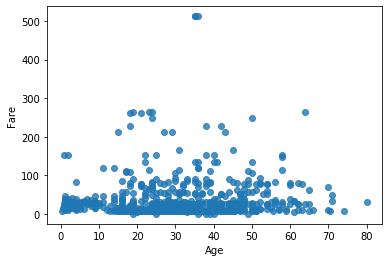

In [18]:
sns.regplot(x="Age", y="Fare", fit_reg=False, data=df)
# df.plot.scatter(x="Age", y="Fare")   #SAME

## Survival of Male vs Female

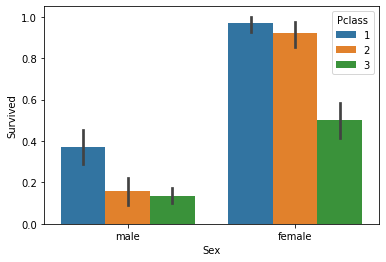

In [19]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df)

In [20]:
sns.regplot(x = 'Age', y = 'Fare', hue='Pclass', fit_reg=False, data=df)

TypeError: regplot() got an unexpected keyword argument 'hue'

## How many females survived from pclass 1?

In [21]:
df[(df['Sex'] == 'female') & (df['Pclass']== 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S,0
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S,0
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,0
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,0


In [22]:
df[(df['Sex'] == 'female') & (df['Pclass']== 1)]['Survived'].value_counts()

1    91
0     3
Name: Survived, dtype: int64

In [24]:
df.groupby(df['Sex', 'Survived'])['Pclass'].value_counts().unstack().plot(kind='bar', stacked=True)

KeyError: ('Sex', 'Survived')

## How many female and male were in P class 2?


In [33]:
print(df[(df['Sex'] == 'female') & (df['Pclass']== 2)]['Sex'].value_counts())
print(df[(df['Sex'] == 'male') & (df['Pclass']== 2)]['Sex'].value_counts())

female    76
Name: Sex, dtype: int64
male    108
Name: Sex, dtype: int64


In [4]:
print(df[df['Embarked']== 'C']['Sex'].value_counts())

male      95
female    73
Name: Sex, dtype: int64


## Get all value counts from a specific column

In [41]:
df.groupby('Sex')['Pclass'].value_counts()

Sex     Pclass
female  3         144
        1          94
        2          76
male    3         347
        1         122
        2         108
Name: Pclass, dtype: int64

In [44]:
### BETTER ####
pd.crosstab(df['Sex'], df['Pclass']) #parameter 1 is the row names, and parameter 2 is the column anems


Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347
